[[0.      0.06395 0.178  ]
 [0.02326 0.04651 0.178  ]
 [0.      0.02907 0.297  ]
 ...
 [0.16279 0.06395 0.379  ]
 [0.13889 0.09722 0.441  ]
 [0.05556 0.0625  0.354  ]]
****************nuber****************:  591
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Cost after iteration 0: 6.381807
Cost after iteration 1000: 6.376954
Cost after iteration 2000: 6.287910
Cost after iteration 3000: 6.225591
Cost after iteration 4000: 6.190528
Cost after iteration 5000: 6.170217
Cost after iteration 6000: 6.158694
Cost after iteration 7000: 6.151520
Cost after iteration 8000: 6.146560
Cost after iteration 9000: 6.142769
Cost after iteration 10000: 6.139531
Cost after iteration 11000: 6.136364
Cost after iteration 12000: 6.132753
Cost after iteration 13000: 6.128043
Cost after iteration 14000: 6.121365
Cost after iteration 15000: 6.111781
Cost after iteration 16000: 6.098932
Cost after iteration 17000: 6.083787
Cost after iteration 18000: 6.068291
Cost after iteration 1

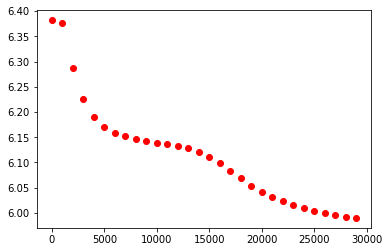

In [10]:
import sys
import os

import cv2
import dlib

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import io

#参数初始化，n_x训练样本数量，n_h神经元，n_y分类的数量
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) * 0.01 #32 * 3
    b1 = np.zeros((n_h,1)) #32 * 1
    W2 = np.random.randn(n_y,n_h) * 0.01 #3 * 32
    b2 = np.zeros((n_y,1))#3 * 1
  
    assert (W1.shape == (n_h, n_x))#32 * 500
    assert (b1.shape == (n_h, 1)) #32 * 1
    assert (W2.shape == (n_y, n_h))#3 * 32
    assert (b2.shape == (n_y, 1))#3 * 1
    
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
    return parameters
 
def forward_propagation(X, parameters):
   
    #参数传递
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
 
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X)+b1 #32 * 3 dot 3 * 500
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2 #3 *32  dot 32 * 3
    A2 = sigmoid(Z2)
    #print("A2",A2)
    #print(A2.shape)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache
 
def compute_cost(A2, Y, parameters):
    #计算损失时，用的是转换之后的标签
    #m = Y.shape[1] # number of example
 
    # Compute the cross-entropy cost
    #softmax
    logprobs = -np.multiply(np.log(A2),Y)#交叉商验证，Y
    cost = np.sum(logprobs)/A2.shape[1]
    #print(logprobs.shape)
    #print(cost.shape)
    return cost
 
def backward_propagation(parameters, cache, X, Y):
    #反向传播时，用的也是转换之后的标签Y->label_train
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
        
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2-Y
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 =  np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    
    return grads
 
# GRADED FUNCTION: update_parameters
 
def update_parameters(parameters, grads, learning_rate = 1.2):
   
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
 
    # Update rule for each parameter
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
   
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters
 
#softmax函数定义
def softmax(x):
    exp_scores = np.exp(x)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return probs
def sigmoid(x):
    s=1/(1+np.exp(-x))
    return s
''' 
data = pd.read_excel('train2018.xlsx',header = None)
train = np.array(data)
 
X = train[:,0:100]
Y = train[:,100]
Y = Y.reshape((Y.shape[0],1))
#print(X.shape)
#print(X)
#print(Y.shape) # 1*6100
#print(Y)
 
X = X.T
Y = Y.T
n_x = X.shape[0]
n_h = 32
n_y = 3
''' 
data = []
Y = []
with open('/home/leipeng/emRedata.txt', 'r') as f:#with语句自动调用close()方法
    line = f.readline()
    while line:
        eachline = line.split()###按行读取文本文件，每行数据以列表形式返回
        read_data = [ float(x) for x in eachline[0:3] ] #TopN概率字符转换为float型
        #print(read_data)
        lable = [ int(x) for x in eachline[-1] ]#lable转换为int型
        Y.append(lable)
        read_data.append(int(lable[0]))
 
        #read_data = list(map(float, eachline))
        data.append(read_data)

        line = f.readline()
Y = np.array(Y)
#print(Y.shape)
#print(Y)
data = np.array(data)
X = data[:,:-1]
print(X)
 
X = X.T
Y = Y.T
n_x = X.shape[0]
n_h = 32
n_y = 3
parameters = initialize_parameters(n_x, n_h, n_y)#3 32 3
 
 
num_iterations = 30000
nuber = Y.shape[1] #nuber = 591
print("****************nuber****************: ",nuber)
label_train=np.zeros((3,nuber))# 3 * 591
#根据Y值，转换分类标签，这里有三类输出:{0，1，2}
#Y为1*591，转换之后为3*591
print(label_train)
for k in range(nuber):
    if Y[0][k] == 0:
        label_train[0][k] = 1
    if Y[0][k] == 1:
        label_train[1][k] = 1
    if Y[0][k] == 2:
        label_train[2][k] = 1
    #label_train[int(Y[0][i])][i]=1
    
#print(label_train.shape)
#print(label_train)

#print(label_train.shape)
#print(label_train)
for i in range(0, num_iterations):
    learning_rate=0.05
    #if i>1000:
       # learning_rate=learning_rate*0.999
    # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
    A2, cache = forward_propagation(X, parameters)
    #print(A2)   
    pre_model = softmax(A2)
    #pre_model = A2
        
    # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
    cost = compute_cost(pre_model, label_train, parameters)
 
    # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
    grads = backward_propagation(parameters, cache, X, label_train)
 
    # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
    parameters = update_parameters(parameters, grads, learning_rate)  
        
        # Print the cost every 1000 iterations
    if i % 1000 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
        plt.plot(i, cost, 'ro')

#******************************数据测试****************************        
data = []
Y = []
with open('/home/leipeng/testEmRedata.txt', 'r') as f:#with语句自动调用close()方法
    line = f.readline()
    while line:
        eachline = line.split()###按行读取文本文件，每行数据以列表形式返回
        #print(eachline)
        #print(eachline[3])
        read_data = [ float(x) for x in eachline[0:3] ] #TopN概率字符转换为float型
        #print(read_data)
        lable = [ int(x) for x in eachline[3] ]#lable转换为int型
        Y.append(lable)
        read_data.append(int(lable[0]))
 
        #read_data = list(map(float, eachline))
        data.append(read_data)
        line = f.readline()
Y = np.array(Y)
print(Y.shape)
print(Y)
data = np.array(data)
X_test = data[:,:-1]
print(X_test)

Y_label = Y
Y_label = Y_label.reshape((Y_label.shape[0],1))
 
X_test = X_test.T
Y_label = Y_label.T
print(Y_label)
count = 0
a2,xxx=forward_propagation(X_test,parameters)
 
for j in range(Y_label.shape[1]):
    #np.argmax返回最大值的索引
    predict_value=np.argmax(a2[:,j])
    #在val上计算准确度
    if predict_value==int(Y_label[:,j]):
        count=count+1
    if predict_value == 0:
        print("angry")
    elif predict_value == 1:
        print("happy")
    else:
        print("surpise")
print(np.divide(count,Y_label.shape[1]))

